In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


# Importing Covid-19 Dataset

In [9]:
corona_dataset_csv = pd.read_csv(r"C:\Users\Tauseef Ahmed\Downloads\CSV\covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Delete useless columns

In [10]:
corona_dataset_csv.drop(["Lat" , "Long"], axis=1 , inplace= True)

In [11]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


# Aggregating Rows by Country

In [12]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [6]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [13]:
corona_dataset_aggregated.shape

(187, 100)

# Visualizing data related to country for eg. China

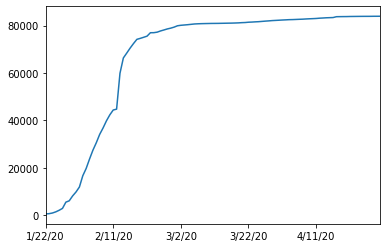

In [8]:
corona_dataset_aggregated.loc["China"].plot()

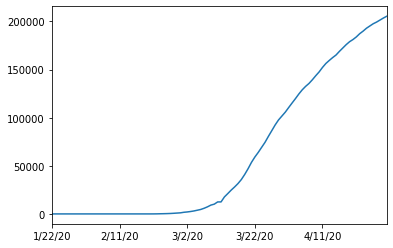

In [9]:
corona_dataset_aggregated.loc["Italy"].plot()

# Finding good measure

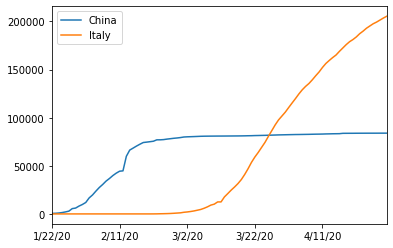

In [14]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

## first 3 days

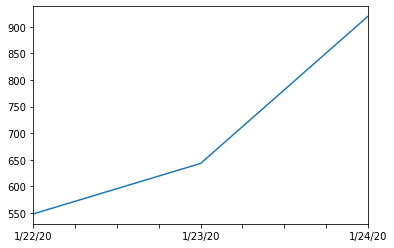

In [11]:
corona_dataset_aggregated.loc['China'][:3].plot()

## CALCULATING AND PLOTTING FIRST DIRIVATIVE OF CURVE

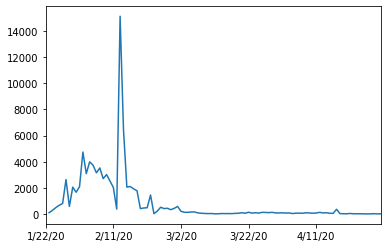

In [12]:
corona_dataset_aggregated.loc['China'].diff().plot()

## finding max difference rate / infection rate

In [13]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

## max infection rate of all countries

In [14]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [15]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


## use only max_infec_rate and ignore other

In [16]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [17]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [19]:
happiness_report_csv=pd.read_csv(r"C:\Users\Tauseef Ahmed\Downloads\CSV\worldwide_happiness_report.csv")

In [20]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [22]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [23]:
happiness_report_csv.set_index("Country or region",inplace=True)

In [24]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [25]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [26]:
corona_data.shape

(187, 1)

In [27]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [28]:
happiness_report_csv.shape

(156, 4)

In [29]:
data=corona_data.join(happiness_report_csv,how="inner")

In [30]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [31]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


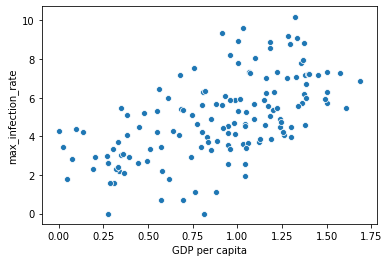

In [32]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

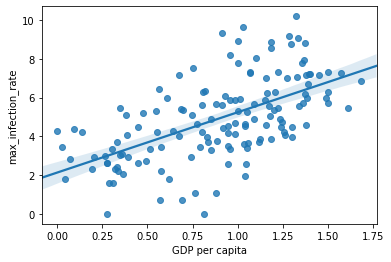

In [33]:
sns.regplot(x,np.log(y))

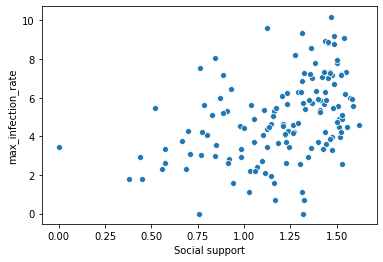

In [34]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

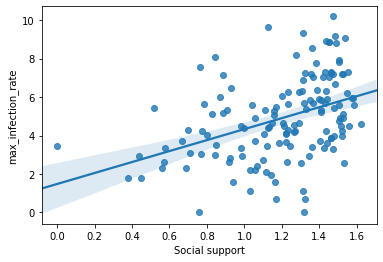

In [35]:
sns.regplot(x,np.log(y))

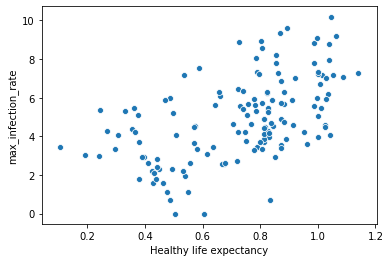

In [36]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

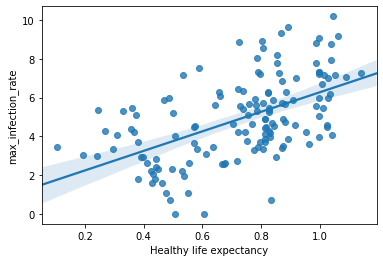

In [37]:
sns.regplot(x,np.log(y))

In [ ]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

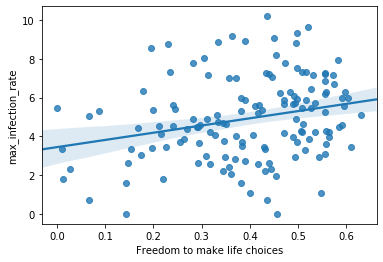

In [40]:
sns.regplot(x,np.log(y))

## With Death Dataset

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates
corona_dataset_aggregated.head()
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [56]:
deaths_dataset_csv = pd.read_csv(r"C:\Users\Tauseef Ahmed\Downloads\CSV\covid19_deaths_dataset.csv")

In [57]:
deaths_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [43]:
deaths_dataset_csv.drop(["Lat" , "Long"], axis=1 , inplace= True)

In [44]:
deaths_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [60]:
deaths_dataset_aggregated = deaths_dataset_csv.groupby("Country/Region").sum()

In [61]:
deaths_dataset_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


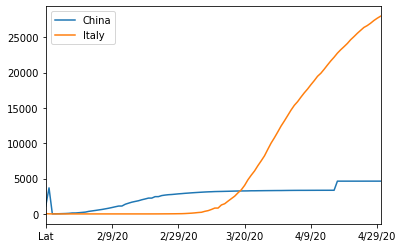

In [62]:
deaths_dataset_aggregated.loc["China"].plot()
deaths_dataset_aggregated.loc["Italy"].plot()
plt.legend()

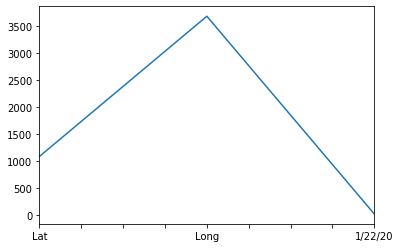

In [63]:
deaths_dataset_aggregated.loc['China'][:3].plot()

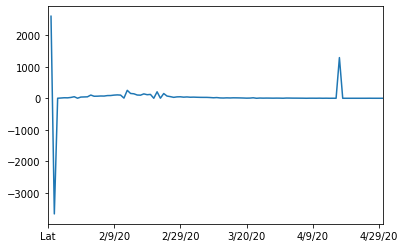

In [64]:
deaths_dataset_aggregated.loc['China'].diff().plot()

In [65]:
deaths_dataset_aggregated.loc['China'].diff().max()

2601.0830000000005

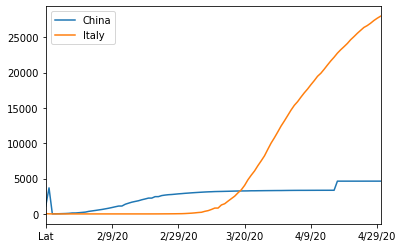

In [66]:
deaths_dataset_aggregated.loc["China"].plot()
deaths_dataset_aggregated.loc["Italy"].plot()
plt.legend()

In [67]:
countries = list(deaths_dataset_aggregated.index)
max_deaths_rates = []
for c in countries :
    max_deaths_rates.append(deaths_dataset_aggregated.loc[c].diff().max())
deaths_dataset_aggregated["max_deaths_rate"] = max_deaths_rates

In [68]:
deaths_dataset_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_deaths_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,32.0000
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0000
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0000
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0000
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,29.0766


In [70]:
corona_deaths_data = pd.DataFrame(deaths_dataset_aggregated["max_deaths_rate"])

In [73]:
corona_deaths_data.head()

,max_deaths_rate
Country/Region,
Afghanistan,32.0000
Albania,4.0000
Algeria,30.0000
Andorra,4.0000
Angola,29.0766


In [74]:
corona_deaths_data.head()

,max_deaths_rate
Country/Region,
Afghanistan,32.0000
Albania,4.0000
Algeria,30.0000
Andorra,4.0000
Angola,29.0766


In [76]:
corona_deaths_data.shape

(187, 1)

In [77]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [78]:
happiness_report_csv.shape

(156, 4)

In [79]:
data2=corona_deaths_data.join(happiness_report_csv,how="inner")

In [80]:
data2.head()

,max_deaths_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,32.0000,0.350,0.517,0.361,0.000
Albania,4.0000,0.947,0.848,0.874,0.383
Algeria,30.0000,1.002,1.160,0.785,0.086
Argentina,63.6167,1.092,1.432,0.881,0.471
Armenia,4.9691,0.850,1.055,0.815,0.283


In [81]:
data2.corr()

,max_deaths_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_deaths_rate,1.000000,0.241616,0.197833,0.307583,0.172166
GDP per capita,0.241616,1.000000,0.759468,0.863062,0.394603
Social support,0.197833,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.307583,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.172166,0.394603,0.456246,0.427892,1.000000


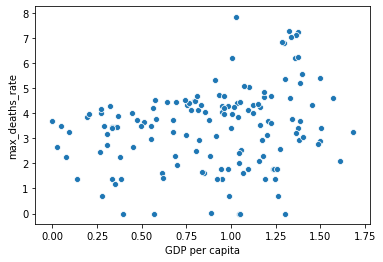

In [84]:
a = data2["GDP per capita"]
b = data2["max_deaths_rate"]
sns.scatterplot(a,np.log(b))

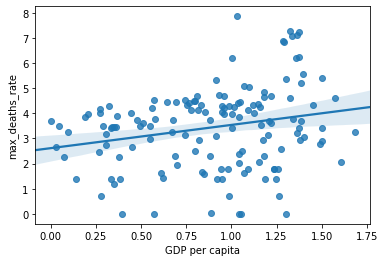

In [85]:
sns.regplot(a,np.log(b))

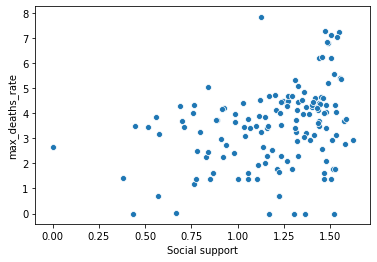

In [86]:
a = data2["Social support"]
b = data2["max_deaths_rate"]
sns.scatterplot(a,np.log(b))

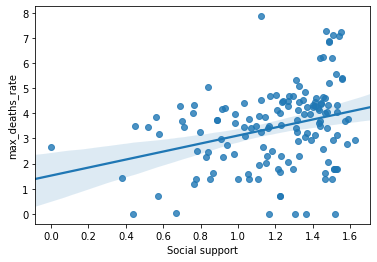

In [87]:
sns.regplot(a,np.log(b))

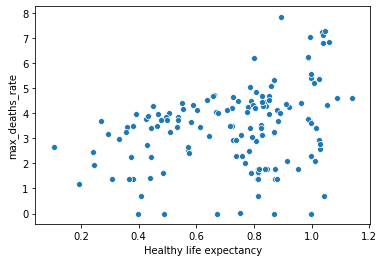

In [88]:
a = data2["Healthy life expectancy"]
b = data2["max_deaths_rate"]
sns.scatterplot(a,np.log(b))

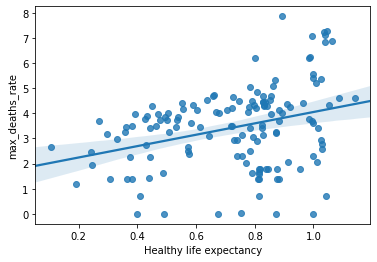

In [89]:
sns.regplot(a,np.log(b))

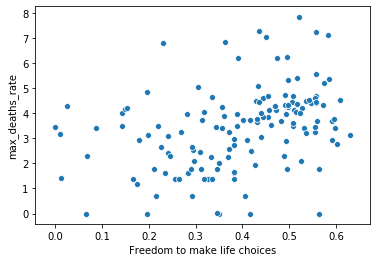

In [91]:
a = data2["Freedom to make life choices"]
b = data2["max_deaths_rate"]
sns.scatterplot(a,np.log(b))

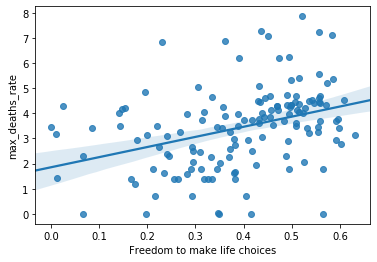

In [92]:
sns.regplot(a,np.log(b))